# Import Libs

In [1]:
!pip install bertopic==0.16.0 datasets==2.16.1 Arabic-Stopwords==0.4.3

INFO: pip is looking at multiple versions of multiprocess to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 507.1/507.1 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 360.5/360.5 kB 22.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.4/166.4 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.4/126.4 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.2/255.2 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/19

In [12]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import re
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# Loading Data

In [3]:
ar_dataset = load_dataset("saudinewsnet")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:99: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/datasets/load.py:1429: FutureWarning: The repository for saudinewsnet contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/saudinewsnet
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this dataset from the next major release of `datasets`.
  warnings.warn(


Generating train split:   0%|          | 0/31030 [00:00<?, ? examples/s]

In [4]:
ar_dataset["train"][0]

{'source': 'aawsat',
 'url': 'http://aawsat.com/home/article/410826/بريطانيا-أربعة-محاور-لاستراتيجية-جديدة-تتصدى-للتطرف-على-مدى-خمس-سنوات',
 'date_extracted': '2015-07-21 02:51:32',
 'title': 'بريطانيا: أربعة محاور لاستراتيجية جديدة تتصدى للتطرف على مدى خمس سنوات',
 'author': 'لندن: رنيم حنوش',
 'content': 'حدد رئيس الوزراء البريطاني ديفيد كاميرون، اليوم (الاثنين)، ملامح استراتيجية للتصدي للتطرف داخل بريطانيا؛ وهي مسألة اعتبرها كاميرون "صراع جيلنا"، متعهدا خلال خطابه في مدينة بيرمنغهام بالتصدي لهؤلاء الذين ينشرون التطرف بين الشبان المسلمين البريطانيين.\n\n ورسم كاميرون الاطار العام لاستراتيجية مكافحة التطرف التي المقرر ان تنشر كاملة في وقت لاحق هذا العام، والتي تسعى للتصدي لانتشار الأفكار المتطرفة التي يروج لها متشددو تنظيم "داعش".\n\n وحسبما تناقلت وسائل الإعلام البريطانية، فإن خطة رئيس الوزراء ستكون على مدى خمسة أعوام للقضاء على التطرف الداخلي من خلال أربعة محاور، وهي: القضاء على إيديولوجية التطرف، والوقوف في وجه عمليات التجنيد وغسل الأدمغة بالأفكار المتطرفة، وإعادة اصوات الاسلام الم

In [5]:
raw_dataset = [
    {
        "text": rec["content"],
        "source": rec["source"],
        "date": rec["date_extracted"]
    }
    for rec in ar_dataset["train"]

]

In [6]:
raw_dataset_df = pd.DataFrame( raw_dataset )
raw_dataset_df = raw_dataset_df.sample(frac= 1, random_state= 42)  # for shuffling

In [7]:
raw_dataset_df.head()

,text,source,date
16261,واس – جدة: تلقى خادم الحرمين الشريفين الملك س...,sabq,2015-08-01 07:51:33
28287,لفت وزير العدل أشرف ريفي في تصريح امس «انه لو...,almadina,2015-08-10 19:24:39
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح...,alriyadh,2015-08-06 01:13:10
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى...,alwatan,2015-08-10 19:44:53
2772,سبق- جدة: يقدّم الدكتور عبدالرحمن بن رجا الله...,sabq,2015-07-21 02:42:37


# Data Cleaning

In [8]:
def clean_text(text: str):
  if not isinstance(text, str):
    return ""

  # replace urls with رابط
  text = re.sub(r"https\S+", " رابط ", text)

  # replace any digits with رقم
  text = re.sub(r"\d+", " رقم ", text)

  # set space before and after any punctuation
  text = re.sub(r"([^\w\s])", r"\1", text)

  # remove extra spaces
  text = re.sub(r"\s+", " ", text)

  words = word_tokenize(text)
  text = " ". join([w for w in words if len(w) > 1])

  return text.lower().strip()

In [9]:
raw_dataset_df["text"] = raw_dataset_df["text"].apply(clean_text)

In [10]:
raw_dataset_df["text_len"] = raw_dataset_df["text"].apply(len)

In [11]:
raw_dataset_df.head()

,text,source,date,text_len
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,957
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1908
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,1203
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى ...,alwatan,2015-08-10 19:44:53,2751
2772,سبق- جدة يقدّم الدكتور عبدالرحمن بن رجا الله ا...,sabq,2015-07-21 02:42:37,742


<Axes: xlabel='text_len', ylabel='Count'>

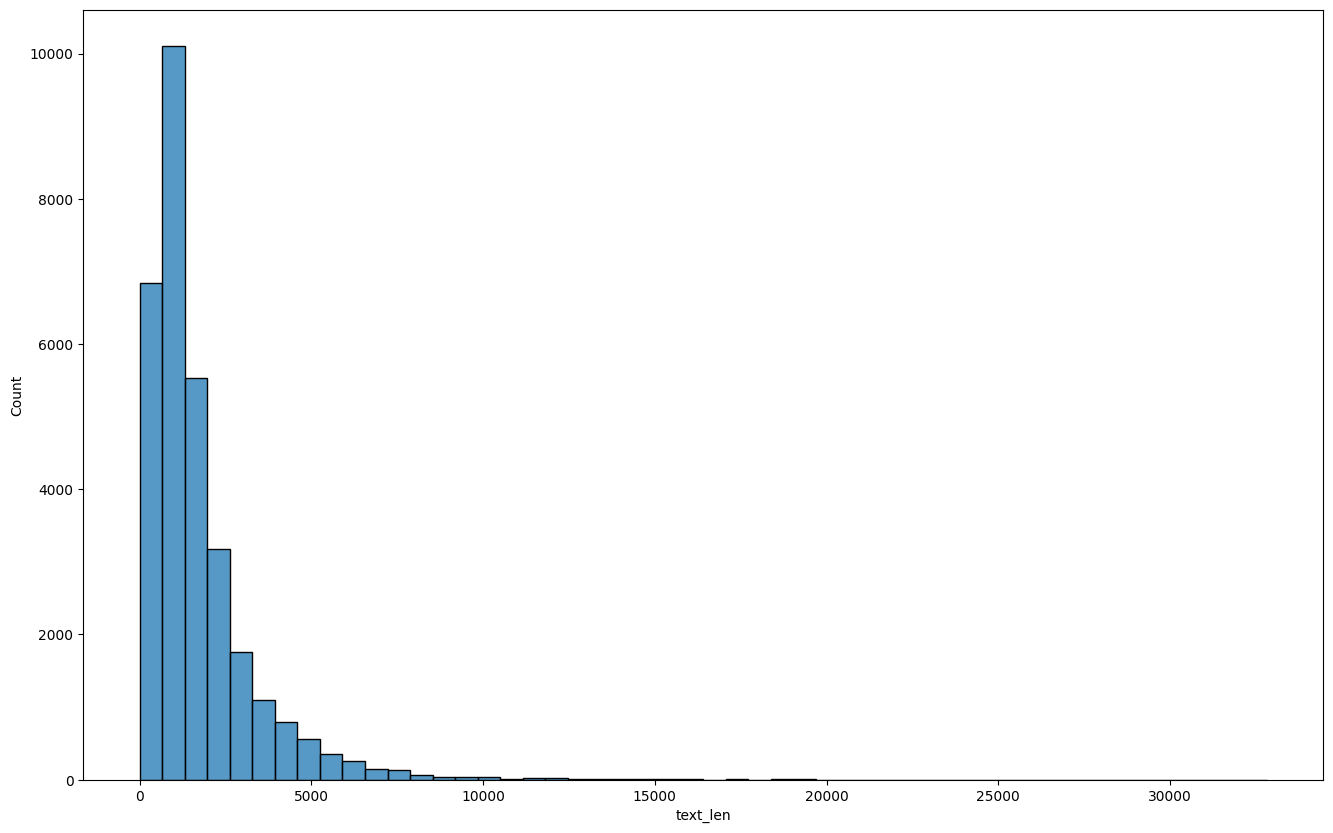

In [13]:
plt.figure(figsize=(16,10))
sns.histplot(raw_dataset_df["text_len"], bins=50)

In [14]:
print(raw_dataset_df.shape)

raw_dataset_df = raw_dataset_df[ raw_dataset_df["text_len"] <= 10_000 ]

print(raw_dataset_df.shape)

(31030, 4)
(30886, 4)


In [15]:
raw_dataset_df.drop_duplicates(["text"], inplace=True)
print(raw_dataset_df.shape)


(29732, 4)


In [17]:
raw_dataset_df["datetime_stamp"] = raw_dataset_df["date"].apply(lambda v: datetime.strptime(v, "%Y-%m-%d %H:%M:%S"))
raw_dataset_df['datetime_stamp'] = raw_dataset_df['datetime_stamp'].apply(lambda v: v.replace(hour=0, minute=0, second=0)) # if we wanna visulzie or track data per date

# Embedding

In [18]:
from sentence_transformers import SentenceTransformer
model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"

embedding_model = SentenceTransformer(model_id, device="cuda:0")

modules.json:   0%|          | 0.00/341 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/122 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/2.69k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/610 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/539M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/531 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.96M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

2_Dense/config.json:   0%|          | 0.00/114 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.58M [00:00<?, ?B/s]

In [19]:
news_embddings = embedding_model.encode(raw_dataset_df["text"].values, show_progress_bar=True)

Batches:   0%|          | 0/930 [00:00<?, ?it/s]

In [20]:
news_embddings.shape

(29732, 512)

# Dim Reduction

In [21]:
from umap import UMAP

umap_model = UMAP(
    n_neighbors=15,
    n_components=15,
    min_dist=0.0,
    metric="cosine",
    random_state=42
)

# Clustering

In [22]:
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(
    min_cluster_size= 50,
    metric="euclidean",
    cluster_selection_method="eom",
    prediction_data=True
)

# Vectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
import arabicstopwords.arabicstopwords as stp

stop_words = stp.stopwords_list()

vectorizer_model = CountVectorizer(
    min_df=3,
    stop_words=stop_words,
    analyzer="word",
    max_df=0.5,
    ngram_range=(1,3)
)

# Topic Representer ( `optional` )

In [27]:
from bertopic.representation import KeyBERTInspired

keybert_model = KeyBERTInspired()

representation_model = {
    "keyBERT": keybert_model
}




> NOW we create every module in BERTOPIC individual, So we will merge all




# let's GO

In [29]:
from bertopic import BERTopic

topic_model = BERTopic(
    # pipeline models
    embedding_model= embedding_model,
    umap_model=umap_model,
    hdbscan_model=hdbscan_model,
    vectorizer_model=vectorizer_model,
    representation_model=representation_model,

    # Hyperparams
    top_n_words=10,
    verbose=True

)

###########################################################
topics, probs = topic_model.fit_transform(
    raw_dataset_df["text"].values,
    news_embddings
)

2024-10-14 11:30:21,766 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")
2024-10-14 11:31:25,284 - BERTopic - Dimensionality - Completed ✓
2024-10-14 11:31:25,288 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-10-14 11:31:38,364 - BERTopic - Cluster - Completed ✓
2024-10-14 11:31:38,383 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-10-14 11:32:43,379 - BERTopic - Representation - Completed ✓


In [30]:
print(
    raw_dataset_df['text'].values[50],
    topics[50], probs[50]
)

topic_model.get_topic(17)

افتتح مدير عام الشؤون الصحية بمنطقة تبوك الصيدلي محمد الطويلعي وحدتي العناية المركزة والعزل بمستشفى الملك فهد بتبوك، إضافة لعيادتي الأمراض التنفسية وفحص النساء وأوضح مدير مستشفى الملك فهد بتبوك سليمان -علي أبوذراع-، أنه تم إنشاء وحدة عناية مركزة جديدة مجهزة بأحدث المواصفات بجانب تدعيمها الكامل بما يلزم من كوادر طبية وفنية، لتسهم مع مستشفيات المنطقة في تقديم أفضل الخدمات الصحية، مشيراً إلى أنه تم استحداث وحدة عزل داخل قسم الطوارئ خاصة بمرضى متلازمة الشرق الأوسط التنفسية كورونا مجهزة بجميع التجهيزات والفلاتر التي تضمن سلامة المريض والعاملين، إضافة لاستحداث وحدة فحص خاصة بالنساء وتوسعة قاعة التدريب والتعليم بالمستشفى 6 1.0


[('بشرطة', 0.024862128529917402),
 ('القبض', 0.0186882300971882),
 ('لشرطة', 0.017808009532201366),
 ('الناطق الإعلامي', 0.01622521734832639),
 ('بشرطة منطقة', 0.01533225314590776),
 ('الجهات الأمنية', 0.015073983664226267),
 ('الإعلامي بشرطة', 0.014025315131251713),
 ('الاختصاص', 0.01399424996293151),
 ('الجاني', 0.013992644664753381),
 ('العقيد', 0.01332776128894216)]

In [31]:
raw_dataset_df['topic'] = topics
raw_dataset_df['prob'] = probs

In [32]:
raw_dataset_df[ raw_dataset_df['topic'] == 17 ].head(10)

,text,source,date,text_len,datetime_stamp,topic,prob
14475,صرح الناطق الإعلامي بشرطة منطقة مكة المكرمة ال...,alweeam,2015-07-31 18:23:52,467,2015-07-31,17,0.977851
26426,نايف السعدي عين اليوم ألقت الجهات الأمنية القب...,3alyoum,2015-08-09 17:28:48,455,2015-08-09,17,0.825582
7554,أطلق مجهولون النار مساء يوم أمس الأول بمحافظة ...,almadina,2015-07-24 06:57:14,664,2015-07-24,17,1.000000
3578,أقدم شاب يُشتبه بأنّه مريض نفسيًّا على قتل ثلا...,almadina,2015-07-22 13:50:43,621,2015-07-22,17,1.000000
28385,قتل شخصان طعنا وأصيب ثالث بجروح بالغة ظهر الاث...,alriyadh,2015-08-10 19:26:01,762,2015-08-10,17,1.000000
14355,تمكن رجال أمن الطرق من ضبط مواطن بحوزته رقم حب...,alweeam,2015-07-31 04:11:32,538,2015-07-31,17,0.748858
8300,تحقق شرطة البتراء في وفاة طفلة تبلغ من العمر ر...,okaz,2015-07-24 05:47:47,556,2015-07-24,17,1.000000
27785,بعد مضي عام على سرقة سيارة والده، تعرف صبي ألم...,aawsat,2015-08-10 18:46:01,364,2015-08-10,17,0.801103
4070,أقدم مدمن مخدرات على قتل شقيقه لأنه نصحه بعدم ...,alriyadh,2015-07-22 09:56:34,659,2015-07-22,17,0.977851
5712,ألقت مجموعة من الشباب في ألمانيا الأربعاء الحج...,alriyadh,2015-07-23 19:15:50,373,2015-07-23,17,0.778898


In [33]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,keyBERT,Representative_Docs
0,-1,9453,-1_السمو الملكي_الملكي الأمير_السمو الملكي الأ...,"[السمو الملكي, الملكي الأمير, السمو الملكي الأ...","[الأمير محمد, السمو الملكي الأمير, الملكي الأم...",[إنفاذًا لتوجيهات خادم الحرمين الشريفين الملك ...
1,0,4119,0_القدم_النادي_الموسم_اللاعب,"[القدم, النادي, الموسم, اللاعب, اللاعبين, لكرة...","[السعودي لكرة القدم, كأس العالم, فريقه, إدارة ...",[تنفس اليوناني جورجيوس دونيس المدير الفني لفري...
2,1,997,1_السويس_قناة السويس_المصري_القناة,"[السويس, قناة السويس, المصري, القناة, المصرية,...","[الرئيس المصري, الرئيس عبدالفتاح السيسي, الرئي...",[احتفلت مصر بعد ظهر أمس رسميا بافتتاح مشروع قن...
3,2,878,2_الإرهابي_قوات الطوارئ_مسجد_عسير,"[الإرهابي, قوات الطوارئ, مسجد, عسير, رجال الأم...","[تفجير مسجد, مسجد قوات الطوارئ, استهدف مسجد, ا...",[استشهد رقم من منسوبي قوات الطوارئ الخاصة وثلا...
4,3,826,3_البلدية_نزع_الإسكان_نزع ملكية,"[البلدية, نزع, الإسكان, نزع ملكية, ملكية, وزار...","[ملكية رقم, وقدره رقم رقم, وقدره رقم, رقم رقم ...",[وافق وزير الشؤون البلدية والقروية عبد اللطيف ...
...,...,...,...,...,...,...
77,76,57,76_البحرين_مملكة البحرين_مملكة_الإيرانية,"[البحرين, مملكة البحرين, مملكة, الإيرانية, الت...","[التدخلات الإيرانية, الخارجية البحرينية, الجمه...",[عين اليوم المنامة أكد الفريق الركن الشيخ راشد...
78,77,56,77_سوق عكاظ_خالد الفيصل_الأمير خالد الفيصل_لسو...,"[سوق عكاظ, خالد الفيصل, الأمير خالد الفيصل, لس...","[الملكي الأمير خالد, الأمير خالد الفيصل, سمو ا...",[تحت رعاية خادم الحرمين الشريفين الملك سلمان ب...
79,78,56,78_أوباما_كينيا_نيروبي_الكينية,"[أوباما, كينيا, نيروبي, الكينية, باراك, الكيني...","[الرئيس أوباما, الأمريكي باراك أوباما, الأميرك...",[يزور الرئيس الأميركي باراك أوباما غدا الخميس ...
80,79,54,79_التحالف_اليمني_هادي_الموالية,"[التحالف, اليمني, هادي, الموالية, قوات التحالف...","[الرئيس عبدربه منصور, الرئيس عبدربه, عبدربه من...",[صدر عن قيادة قوات التحالف بيان بشأن الالتزام ...


In [34]:
topic_model.visualize_topics()

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


In [35]:
topic_model.visualize_heatmap()

In [36]:
topics_per_class = topic_model.topics_per_class(
    raw_dataset_df['text'].values,
    classes=raw_dataset_df['source'].values,
)
##################################################

topic_model.visualize_topics_per_class(topics_per_class, top_n_topics=20)

14it [00:25,  1.84s/it]


In [37]:
topics_over_time = topic_model.topics_over_time(
    raw_dataset_df['text'].values,
    raw_dataset_df['datetime_stamp'].values
)
##################################################

topic_model.visualize_topics_over_time(
    topics_over_time,
    topics=[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
)

18it [02:19,  7.73s/it]


In [38]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)
##################################################

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

100%|██████████| 80/80 [00:01<00:00, 78.95it/s]


# Topics Merging

In [39]:
topics_to_merge = [
    [15, 60, 4],
    [30, 23, 7]
]

topic_model.merge_topics(
    raw_dataset_df['text'].values,
    topics_to_merge
)

In [40]:
hierarchical_topics = topic_model.hierarchical_topics(
    raw_dataset_df['text'].values
)

topic_model.visualize_hierarchy(
    hierarchical_topics=hierarchical_topics
)

100%|██████████| 76/76 [00:01<00:00, 75.71it/s]


# Topics Filtering

In [43]:
raw_dataset_df.head()

,text,source,date,text_len,datetime_stamp,topic,prob
16261,واس جدة تلقى خادم الحرمين الشريفين الملك سلمان...,sabq,2015-08-01 07:51:33,957,2015-08-01,1,0.401236
28287,لفت وزير العدل أشرف ريفي في تصريح امس انه لولا...,almadina,2015-08-10 19:24:39,1908,2015-08-10,27,1.000000
21803,عقد مدير الكرة بالمنتخب السعودي زكي الصالح مسا...,alriyadh,2015-08-06 01:13:10,1203,2015-08-06,0,1.000000
28752,حوادث المعلمات ومعاناتهن في الوصول يومياً إلى ...,alwatan,2015-08-10 19:44:53,2751,2015-08-10,-1,0.000000
2772,سبق- جدة يقدّم الدكتور عبدالرحمن بن رجا الله ا...,sabq,2015-07-21 02:42:37,742,2015-07-21,-1,0.000000


In [47]:
filtered_raw_dataset_df = raw_dataset_df[ ~raw_dataset_df['topic'].isin([-1]) ] # remove topic -1 which is noise

# inference

In [48]:
story = """
طرحت مؤسسة البترول الكويتية عطاءً؛ لبيع زيت وقود عالي الكبريت للتحميل في الفترة من فبراير/ شباط إلى إبريل/ نيسان.
وأوضحت مصادر تجارية، اليوم الخميس، أن المؤسسة تعرض شحنات من زيت الوقود عالي الكبريت تبلغ الواحدة 60 ألف طن لتحميلها من الكويت شهرياً بالفترة المذكورة.
"""

_topic, _prob =  topic_model.transform([story])

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

2024-10-14 11:38:53,825 - BERTopic - Dimensionality - Reducing dimensionality of input embeddings.
2024-10-14 11:38:54,612 - BERTopic - Dimensionality - Completed ✓
2024-10-14 11:38:54,613 - BERTopic - Clustering - Approximating new points with `hdbscan_model`
2024-10-14 11:38:54,619 - BERTopic - Cluster - Completed ✓


In [49]:
_topic, _prob

([-1], array([0.]))

In [50]:
topic_model.get_topic(_topic[0])

[('السمو الملكي', 0.002401938778237873),
 ('الملكي الأمير', 0.002305945471990127),
 ('السمو الملكي الأمير', 0.0023042115791750742),
 ('اليمن', 0.0022890264259859197),
 ('عدن', 0.0021474013787098336),
 ('صاحب السمو', 0.0020424435609220247),
 ('عسير', 0.0019371302096005726),
 ('اليمنية', 0.0019121863079964432),
 ('الطائف', 0.0018642723748676425),
 ('صاحب السمو الملكي', 0.001862539115246807)]

# Save / Reload

In [ ]:
model_id = "sentence-transformers/distiluse-base-multilingual-cased-v2"
topic_model.save("/content/safe_bertopic", serialization="safetensors",
                 save_ctfidf=True, save_embedding_model=model_id)

loaded_model = BERTopic.load("/content/safe_bertopic")

In [ ]:
topic_model.save("/content/pickel_bert_topic_news.pkl", serialization="pickle")

loaded_model = BERTopic.load("/content/pickel_bert_topic_news.pkl")